# Project Team ID : "PTID-CDS-JUN-23-1562"
1) Elfy William (elfywilliam@gmail.com)

2) Kashif Ahmed (kashifahmedm@gmail.com)

3) Munawar Ali (munawarali76753@gmail.com)

4) Shubham Joshi (sajoshi20@gmail.com)

5) Vyankatesh Kongari (Vyankateshkongari12345@gmail.com)

# PRCP 1001-Rice Leaf

# Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,cv2,glob
from zipfile import ZipFile
from shutil import copyfile
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import warnings
warnings.filterwarnings('ignore')

C:\Users\Elle\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Elle\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Elle\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data Extraction

In [2]:
#Path of the jupyter file
path=os.getcwd()
path

'C:\\Users\\Elle\\anaconda3\\1st_class\\Projects\\PRCP RICE LEAF'

In [3]:
#Extracting the dataset
with ZipFile(os.path.join(path ,'leaf_class_diseases.zip'),'r') as zipobject:
    zipobject.extractall()

Our image datasets consist of 3 classes, namely Bacterial leaf blight, Brown spot and leaf smut. Each classes contain 40 image data except for leaf smut with 39 image data. 

- Bacterial leaf blight : Bacterial leaf blight of rice is a very dangerous disease that can cause significant damage to rice crops. It is caused by the bacterium Xanthomonas oryzae pv. oryzae and is one of the most serious diseases of rice. The disease causes wilting of seedlings and yellowing and drying of leaves. It is most likely to develop in areas that have weeds and stubbles of infected plants, and it can occur in both tropical and temperate environments, particularly in irrigated and rainfed lowland areas. The disease favors temperatures at 25−34°C, with relative humidity above 70%. The earlier the disease occurs, the higher the yield loss. Yield loss due to bacterial blight can be as much as 70% when susceptible varieties are grown, in environments favorable to the disease

- Brown spot : Brown spot is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets of rice plants1.It is a fungal issue, caused by Bipolaris oryzae (previously known as Helminthosporium oryzae). Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf. When infection occurs in the seed, unfilled grains or spotted or discolored seeds are formed. Brown spots on rice can start on even seedling leaves and are usually small, round to oval circles, brownish in color.  As the crop grows, leaf spots may change colors and vary in shape and size, but are usually round. The disease can develop in areas with high relative humidity (86−100%) and temperature between 16 and 36°C. It is common in unflooded and nutrient-deficient soil, or in soils that accumulate toxic substances. For infection to occur, the leaves must be wet for 8−24 hours. The fungus can survive in the seed for more than four years and can spread from plant to plant through air.

- Leaf Smut : Leaf smut is a fungal disease caused by Entyloma oryzae that affects rice crops. The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves. Although rare, it also can produce spots on leaf sheaths. The characteristic sign of rice with leaf smut is the presence of small black spots on the leaves. They are slightly raised and angular and give the leaves the appearance of having been sprinkled with ground pepper. Coverage by these spots is most complete on the oldest leaves. The tips of some leaves with the most infection may die. It is widespread where rice is grown, but leaf smut doesn’t often cause serious damage.

In [7]:
#Number of classes in dataset
dir_list=os.listdir(os.path.join(path ,'Data'))
print('The Number of Classes in the Dataset is:{}'.format(len(dir_list)))

The Number of Classes in the Dataset is:3


In [8]:
#File path of dataset
source_dir = os.path.join(path ,'Data')        

#list of all file present in the specified path
dir_list = os.listdir(source_dir)

for folder in dir_list:
    
    #File path
    data_dir = os.listdir(os.path.join(source_dir,folder))
    
    ##Modify a sequence in-place by shuffling its contents
    np.random.shuffle(data_dir)

# Train, Test, Split

In [9]:
batch_size = 32
img_height = 224
img_width = 224

We will use 80% of the images for training and 20% for validation.

In [10]:
# Training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  source_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 119 files belonging to 3 classes.
Using 96 files for training.


In [11]:
# Validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  source_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 119 files belonging to 3 classes.
Using 23 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


# Data Visualization

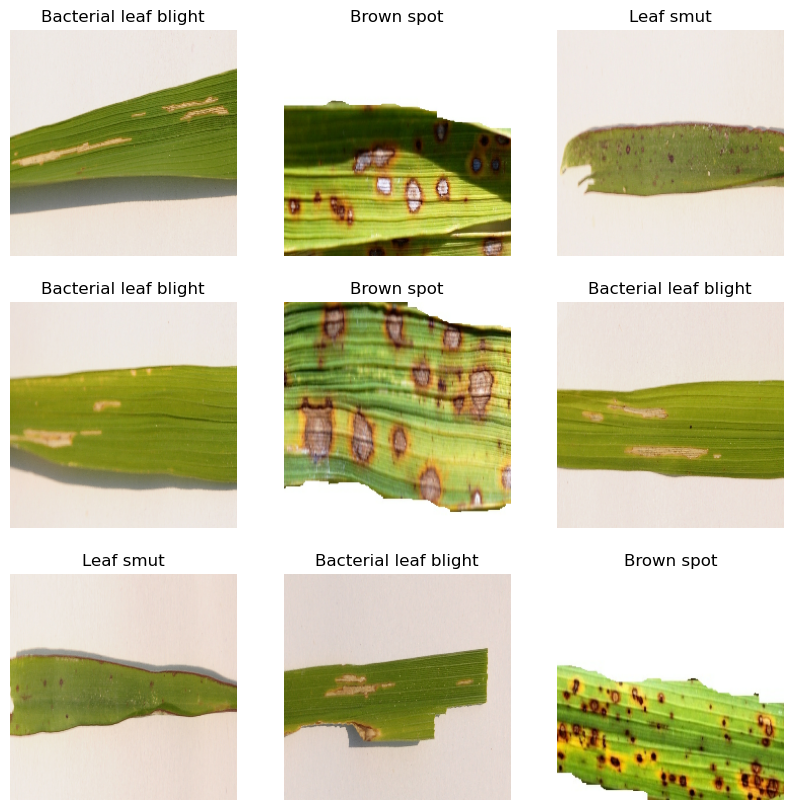

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


The image_batch is a tensor of the shape (32, 224, 224, 3). This is a batch of 32 images of shape 224 x224x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

# Data Configuration for Performance

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(img_height,img_width),
                                         layers.experimental.preprocessing.Rescaling(1/255)])

In [17]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                         layers.experimental.preprocessing.RandomRotation(0.2)])

# Model Creation

## CNN Model

In [18]:
# Model Creation
input_shape = (batch_size, img_height, img_width, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation, 
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')])

model.build(input_shape = input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                 

In [20]:
model.compile(
    optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [21]:
# Training the model
history = model.fit(
    train_ds, 
    epochs=50,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds)

Epoch 1/50
3/3 [==============================] - 9s 2s/step - loss: 1.0895 - accuracy: 0.3438 - val_loss: 1.1676 - val_accuracy: 0.3478
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 1.0905 - accuracy: 0.3958 - val_loss: 1.1767 - val_accuracy: 0.1739
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 1.0687 - accuracy: 0.4062 - val_loss: 1.2212 - val_accuracy: 0.2609
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 1.0590 - accuracy: 0.4375 - val_loss: 1.1134 - val_accuracy: 0.2609
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 1.0664 - accuracy: 0.3958 - val_loss: 1.1819 - val_accuracy: 0.2174
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 0.9967 - accuracy: 0.4375 - val_loss: 1.1221 - val_accuracy: 0.3043
Epoch 7/50
3/3 [==============================] - 6s 2s/step - loss: 0.9905 - accuracy: 0.5417 - val_loss: 1.1846 - val_accuracy: 0.3043
Epoch 8/50
3/3 [=========================

# Results Visualization

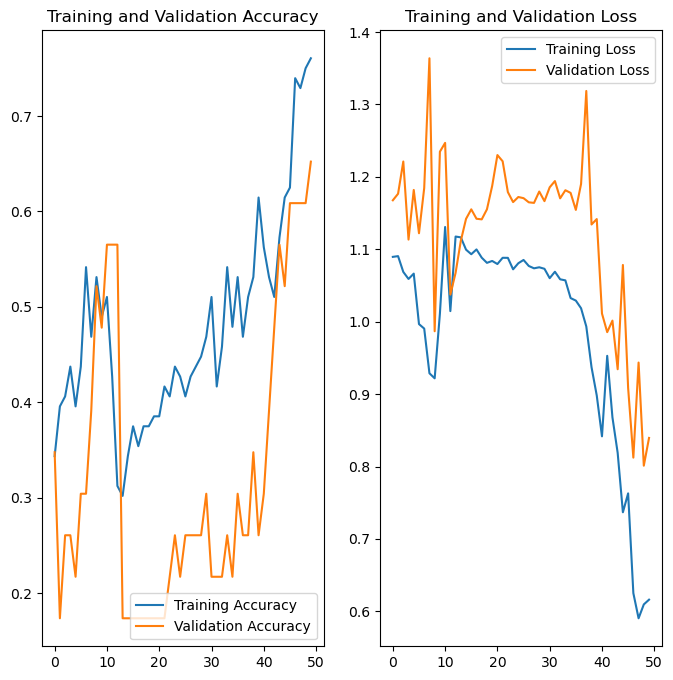

In [27]:
# Plotting the loss and accuracy on the training and validation sets

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predictions on New Data

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to Leaf smut with a 36.26 percent confidence.


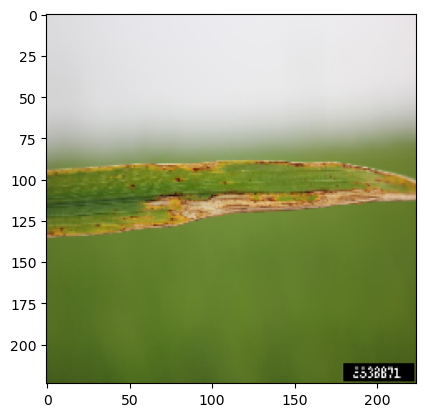

In [30]:
# Predictions for bacterial leaf blight
path="Data/leaf blight.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


plt.imshow(img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 51ms/step
This image most likely belongs to Leaf smut with a 44.43 percent confidence.


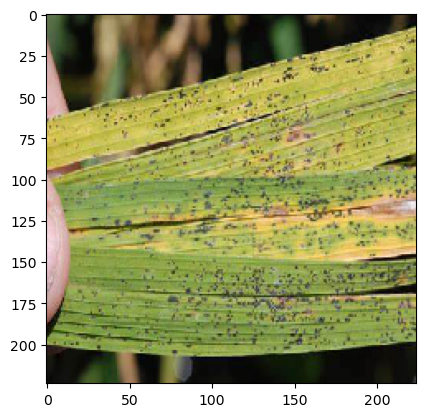

In [24]:
# Predictions for leaf smut
path = "Data/Leaf smut.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


plt.imshow(img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 48ms/step
This image most likely belongs to Brown spot with a 54.41 percent confidence.


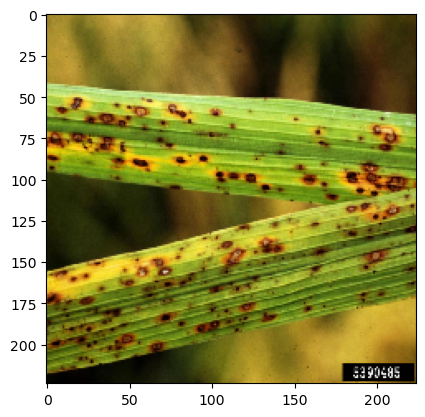

In [25]:
# Prediction for brown spot
path = "Data/brown spot.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


plt.imshow(img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Conclusion

In this project, we managed to classify images of rice leaf diseases using a tf.keras.Sequential model and load data using tf.keras.utils.image_dataset_from_directory. It demonstrates the concepts of efficiently loading a dataset off disk and 
identifying overfitting and applying techniques to mitigate it, including data augmentation and dropout. Our basic machine learning workflow are:

- Examine and understand data
- Build an input pipeline
- Build the model
- Train the model
- Test the model

Our model gives training accuracy of 76% and validation accuracy of 65%. From the results plotting, both the training and validation accuracy increased linearly over time. Then, we tried to use our model to classify new images that wasn't included in the training or validation sets and they classified leaf smut and brown spot images correctly with a fairly average confidence scores. For bacterial leaf blight, the model misclassified it as leaf smut. Meanwhile, the model confidence score is 47% for leaf smut and around 48% for brown spot. Since our validation accuracy score lower than the training validation, this could be the sign for overfitting. Our datasets initially only have 119 data images and we used 96 of them as our training data. When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset. Hence, techniques such as introduction of dropout regularization to the network and data augmentation can be implemented to reduce overfitting.

# Task 3

## CNN Model

Activation Function: A function that is added into an artificial neural network in order to help the network learn complex patterns in the data. Most used function are Sigmoid, ReLU, Leaky ReLU, tanh, Linear, Softmax and etc. In our case we used 'Softmax' activation function.softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

Loss Function: It quantifies the difference between the expected outcome and the outcome produced by the machine learning model. Regression Loss Function, Mean Squared Error, Mean Squared Logarithmic Error Loss. Mean Absolute Error Loss, Binary Classification Loss Function, Binary Cross Entropy Loss. We used Categorical crossentropy,it is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories(105 classes), and the model must decide which one.

Optimizer: An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. Types of optimizer are Gradient Descent, Stochastic Gradient Descent, Adagrad, Adadelta, RMSprop and Adam. We used Adam optimizer because the results are generally better than every other optimization algorithms, have faster computation time, can handle sparse gradients on noisy problems and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications.



## Data Augmentation

Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points. It is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.

Here, we are using Keras preprocessing layers: tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, and tf.keras.layers.RandomZoom. It can generate augmented images dynamically during the training of the model making the overall mode more robust and accurate.

The different techniques are:

1) Random Rotations : The image rotation technique enables the model by generating images of different orientations. It uses this technique to generate randomly rotated images in which the angle can range from 0 degrees to 360 degrees

2) Random Shifts : The random shifts technique helps in improving those images that are not properly positioned. There can be a scenario where they are not in the center of actual orientation. It uses parameters height_shift_range for vertical shifts in an image and for horizontal shifts in an image, we use width_shift_range. The values specified are either specified in the form of percentage or integer.

3) Random Flips : Another beneficial technique for performing augmentation is the flipping of images. It helps in flipping the images, it can either flip horizontally or vertically. For horizontal flip operation, we are using horizontal_flip argument.

4) Random Zoom : The last technique is zooming in or zooming out on any image. ImageDataGenerator class is passed e a float value for the zoom_range parameter that takes a lower limit and an upper limit. Once specified, a zoom operation will be applied to an image. For zooming in, values lesser than 1 should be used. On the other hand, for zooming out, we have to use values greater than 1.

## Dropout

Introducing dropout regularization to the network is a technique to reduce overfitting.

When we apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.